# Wrangle Exercises

In [31]:
import acquire
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py.

1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [54]:
df = acquire.get_telco_data()
df = df[df['contract_type_id'] == 3]
df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]
df.head()

,customer_id,monthly_charges,tenure,total_charges
5348,0016-QLJIS,90.45,65,5957.9
5349,0017-DINOC,45.20,54,2460.55
5350,0019-GFNTW,45.05,56,2560.1
5351,0056-EPFBG,39.40,20,825.4
5352,0078-XZMHT,85.15,72,6316.2


2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [55]:
df.shape

(1695, 4)

In [56]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges       object
dtype: object

In [57]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [58]:
df = df[df['tenure'] != 0]
df['total_charges'] = df['total_charges'].astype('float')
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [59]:
df.describe()

,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


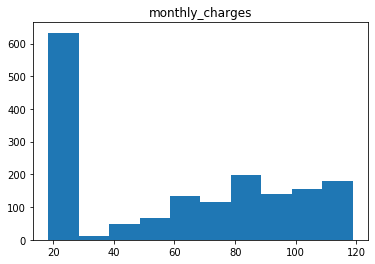

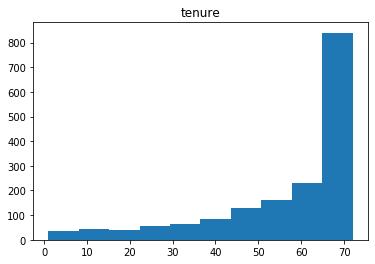

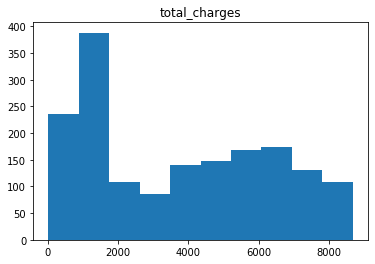

In [68]:
for col in ['monthly_charges', 'tenure', 'total_charges']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

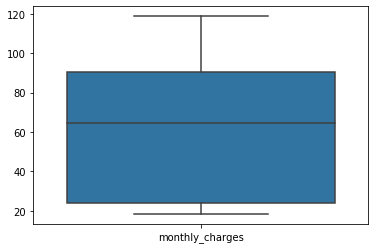

In [39]:
sns.boxplot(data=df[['monthly_charges']])

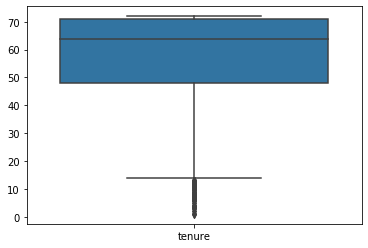

In [41]:
sns.boxplot(data=df[['tenure']])

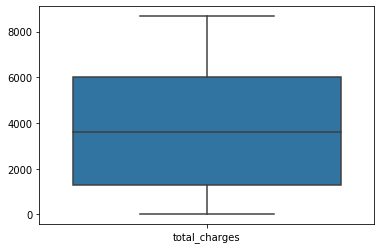

In [43]:
sns.boxplot(data=df[['total_charges']])

In [44]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

3. End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [65]:
def wrangle_telco(df):
    df = df[df['contract_type_id'] == 3]
    df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]
    df = df[df['tenure'] != 0]
    df['total_charges'] = df['total_charges'].astype('float')
    return df

In [66]:
df = acquire.get_telco_data()
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,DSL,Month-to-month,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,DSL,Month-to-month,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,DSL,Month-to-month,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,DSL,Month-to-month,Bank transfer (automatic)


In [67]:
df = wrangle_telco(df)
df

,customer_id,monthly_charges,tenure,total_charges
5348,0016-QLJIS,90.45,65,5957.90
5349,0017-DINOC,45.20,54,2460.55
5350,0019-GFNTW,45.05,56,2560.10
5351,0056-EPFBG,39.40,20,825.40
5352,0078-XZMHT,85.15,72,6316.20
...,...,...,...,...
7038,9950-MTGYX,20.30,28,487.95
7039,9953-ZMKSM,25.25,63,1559.30
7040,9964-WBQDJ,24.40,71,1725.40
7041,9972-EWRJS,19.25,67,1372.90
